In [1]:
%pylab inline
import os, re, json
from collections import OrderedDict
from scipy import stats

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times'], 'size': 14.5})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Populating the interactive namespace from numpy and matplotlib


In [5]:
DPI = 100

In [6]:
data = {}
for d in [2, 3, 4]:
    for r, c, s, ratio in map(lambda x: x.strip().split(), open('../data/data_%d.dat' % d).readlines()):
        r = int(r)
        if r not in data:
            data[r] = {2: [], 3: [], 4: []}
        data[r][d] += [float(ratio)]

In [8]:
for k in data.keys():
    for d in [2, 3, 4]:
        v = data[k][d]
        if len(v):
            data[k][d] = {
                'min': np.min(v),
                'mean': np.mean(v),
                'median': np.median(v),
                'std': np.std(v),
                'max': np.max(v),
            }

ERR 270 3
ERR 290 3
ERR 310 3
ERR 330 3
ERR 370 3
ERR 390 3
ERR 410 3
ERR 430 3
ERR 470 3
ERR 490 3
ERR 3000 3
ERR 4000 3
ERR 5000 3
ERR 6000 3
ERR 7000 3
ERR 8000 3
ERR 9000 3
ERR 10000 3
ERR 11000 3
ERR 12000 3
ERR 13000 3
ERR 14000 3
ERR 15000 3
ERR 16000 3


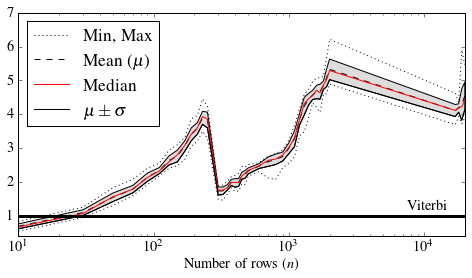

In [23]:
SPLIT_2 = 2**3
SPLIT_3 = 2**8
SPLIT_4 = 2**14

mins = []
maxs = []
medians = []
stds = []
means = []
xs = []
for x in sorted(data.keys()):
    d = -1
    if x >= SPLIT_4:
        d = 4
    elif x >= SPLIT_3:
        d = 3
    elif x >= SPLIT_2:
        d = 2

    if d in [2, 3, 4]:
        if not data[x][d]:
            print "ERR", x, d
            continue
        xs += [x]
        mins += [data[x][d]['min']]
        maxs += [data[x][d]['max']]
        medians += [data[x][d]['median']]
        stds += [data[x][d]['std']]
        means += [data[x][d]['mean']]

mins = np.array(mins)
maxs = np.array(maxs)
medians = np.array(medians)
stds = np.array(stds)
means = np.array(means)

plt.figure(figsize = (8,4.0))
plt.semilogx(xs, mins, 'k', ls='dotted', label = 'Min, Max')
plt.semilogx(xs, maxs, 'k', ls='dotted')
plt.semilogx(xs, means, '--k', label='Mean ($\\mu$)')
plt.semilogx(xs, medians, 'r', label='Median')
plt.semilogx(xs, list(means - stds), 'k', label='$\\mu \\pm \\sigma$')
plt.xlim(xmin = min(xs), xmax = max(xs))
plt.ylim(ymin = .4, ymax = 7)

plt.gca().annotate('Viterbi', xycoords='axes fraction', textcoords='axes fraction', xy = (.87, .12), xytext = (.87, .12))
plt.axhline(y=1, linewidth=3, color='k')
plt.xlabel("Number of rows ($n$)")

plt.fill_between(map(float,xs), list(means - stds), list(means + stds), facecolor = '#DDDDDD')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc = 2, numpoints = 1)

savefig('slices_all.pdf', dpi = DPI, bbox_inches='tight')